In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('../input/tabular-playground-series-dec-2021/train.csv')
test_df = pd.read_csv('../input/tabular-playground-series-dec-2021/test.csv')

# <center> Unbalanced data </center>
## <center> Hello everyone! Here I give some info about unbalanced data pre-processing. </center>

**There are 7 cover types. Needs to figure out the frequency of classes.**

In [ ]:
train_df['Cover_Type'].unique()

**Cover types 4, 5, 6 are too few to classify.**

In [ ]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Cover_Type', data=train_df, ax=ax)

**Cover type 5 has only one sample, that isn't enough to classify this type. The same issue with the classes 4 and 6.**
It is pretty clear that sample imbalance leads to the metric trap. Accuracy score with true pred for class 1 and 2 and false pred for other classes will be close to ideal because shares of class 1 and 2 in sample are high enough. But we may also check F-score, presicion, recall and use confusion matrix.

In [ ]:
stat = pd.DataFrame(train_df['Cover_Type'].value_counts())
stat['percent_type'] = stat['Cover_Type'] / stat['Cover_Type'].sum()
stat.style.bar(subset=["percent_type"], color='orange')\
    .format('{:.2%}', subset=["percent_type"])

# Naive methods

**However we may try to pay alghoritm attention to small classes in different ways.**
**Let's take a look at the classes 1, 2 and 3. The sample is strongly unbalanced.**
Imbalanced classification is the problem of classification when there is an unequal distribution of classes in the training dataset.
One of the possible decisions is resampling.
Two widely spread technique are under- and over- sampling

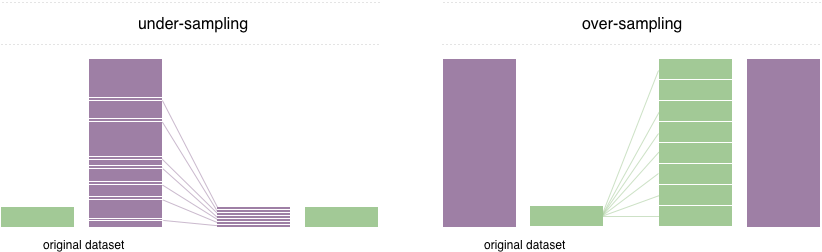

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Try to resample the first three major classes.

In [ ]:
train_df = train_df[train_df['Cover_Type'] < 4]

In [ ]:
X, y = train_df.drop(['Id', 'Cover_Type'], axis=1), train_df['Cover_Type']

Initial sample of the three major classes.

In [ ]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y, ax=ax)

This method has some sampling strategies:
* minority: resample only the minority class;
* not minority: resample all classes but the minority class;
* not majority: resample all classes but the majority class;
* all: resample all classes;
* auto: equivalent to 'not majority'  
Try to use 'all'

RandomOverSampler picks samples at random with replacement

In [ ]:
oversample = RandomOverSampler(sampling_strategy='all', random_state=42)
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_over, ax=ax)

In [ ]:
print(f'sample size after oversampling: {y_over.shape[0]}')

More, we may use shrinkage param for smoothed bootstrap. New generated elements will be closer with increasing parameter shrinkage.

The same way with Undersampling. Picking sampling_strategy='all' we'll expect the balance in three classes but with the less sample size

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='all', random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_under, ax=ax)

In [ ]:
print(f'sample size after oversampling: {y_under.shape[0]}')

# More advanced techniques

**That were classical or naive methods of resampling. But in addition, it should be said about Tomek and SMOT as under- and over- sampling strategies respectively.**

Tomek is an interesting method. The key idea of the method is that the algorithm removes from the selection those examples of the majority class that are too similar to examples of other classes, thereby making their separability more easy for classification.

In [ ]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tomek.fit_resample(X, y)

On the other hand, SMOTE (Synthetic Minority Oversampling Technique) syntesizes the elements of minor classes. This technique uses the k-neighbors for indetification k similar elements and creates new, between this k-nearest elements.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='majority')
X_smote, y_smote = smote.fit_resample(X, y)

Evenmore, you may use SMOTE and Tomek together as a over-sampling after under-sampling with the SMOTETomek method

In [ ]:
from imblearn.combine import SMOTETomek

ST = SMOTETomek(sampling_strategy='auto')
X_st, y_st = ST.fit_resample(X, y)

**Thanks for reading my humble notebook. Good luck in TPS!**

Some useful links:  
**TOMEK:** https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html  
**SMOTE:** https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html  
**SMOTETomek:** https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html  